In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats 
from sklearn.linear_model import LinearRegression

In [0]:
colnames=['CityFrom','CityTo','AvgFare','Distance','AvgWeekPsgrs',
          'MktLeadArLn','MktShare','AvgFareLead','LowPriceArLn','MktShareLow','Price']
airq = pd.read_fwf('http://www.stat.ufl.edu/~winner/data/airq402.dat', names=colnames)

In [43]:
airq.head(10)

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


Exploratory Data Analysis :  

In [19]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
CityFrom        1000 non-null object
CityTo          1000 non-null object
AvgFare         1000 non-null float64
Distance        1000 non-null int64
AvgWeekPsgrs    1000 non-null float64
MktLeadArLn     1000 non-null object
MktShare        1000 non-null float64
AvgFareLead     1000 non-null float64
LowPriceArLn    1000 non-null object
MktShareLow     1000 non-null float64
Price           1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


after looking info command result, null values are not present in columns.

In [20]:
airq.describe()

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFareLead,MktShareLow,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


Box plot is used to represent numeric dataset in a group through their quartiles. that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. So first I will plot box plot of each column

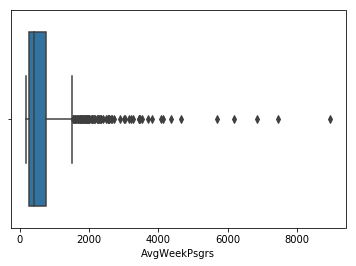

In [21]:
sns.boxplot(x=airq['AvgWeekPsgrs'])

by looking Box plot AvgWeekPsgrs, there are many such type points which are outliner.

Now I will calculate z-score values to find out outliner.We know that any data point is much far from mean 0, lies outside threshold z-value 3, is consindered as outliner.

In [90]:
# z score 
z_AvgWeekPsgrs = np.abs(stats.zscore(airq.AvgWeekPsgrs))
z_AvgWeekPsgrs[z_AvgWeekPsgrs>3]

array([4.63966372, 3.57226691, 3.97766815, 3.03165102, 4.00009942,
       3.94492133, 4.1054192 , 3.56237612, 3.37944697, 3.33482715,
       3.93260334, 3.13630332, 3.81783776, 3.08814384, 4.00384134,
       3.50784527, 4.29162505, 3.94492133, 3.66219426, 3.00921975,
       3.42847619, 4.1898247 , 3.35329401, 3.20444665])

In [78]:
airq.AvgWeekPsgrs[z_AvgWeekPsgrs>3]
# Mean of AvgWeekPsgrs is 672 and median is 404, there is much differece between mean and median.
# below datapoints show their value is very much far from median and mean.

63     6185.43
203    4662.82
278    3149.13
281    4120.00
289    7442.06
295    3042.82
297    3018.80
388    4075.43
405    3261.41
527    8950.76
661    3522.28
669    3205.54
714    5680.65
716    3435.76
754    3698.26
824    6838.15
837    3470.76
844    3427.28
846    4350.54
847    3802.39
Name: AvgWeekPsgrs, dtype: float64

In [0]:
# same step need to follow for other column to indenfiy outliner . below line
num_cols = ['AvgWeekPsgrs','Distance','MktShare','AvgFareLead','MktShareLow','Price']
# removing outliner rows from airq dataframe

In [0]:
for col in num_cols :
  airq=airq.loc[np.abs(stats.zscore(airq[col]))<=3]

In [91]:
airq.describe()

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFareLead,MktShareLow,Price
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,161.012839,1037.994819,591.914528,60.600342,163.677472,34.717119,141.204446
std,51.520527,626.671022,494.655444,19.324762,56.943291,27.276040,43.470238
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,125.150000,550.000000,254.130000,47.010000,124.110000,13.150000,113.370000
50%,160.420000,901.000000,391.410000,59.620000,161.140000,26.320000,137.360000
75%,194.700000,1407.000000,717.710000,74.460000,200.630000,53.200000,167.110000
max,321.400000,2724.000000,2885.760000,100.000000,343.530000,100.000000,273.630000


As we can see above,there are not so much difference between mean and median for all data points after removing outliner





In [92]:
# convert object column into categorical data type
cats = ['CityFrom','CityTo','MktLeadArLn','LowPriceArLn']
airq[cats] = airq[cats].astype('category')
airq.dtypes

CityFrom        category
CityTo          category
AvgFare          float64
Distance           int64
AvgWeekPsgrs     float64
MktLeadArLn     category
MktShare         float64
AvgFareLead      float64
LowPriceArLn    category
MktShareLow      float64
Price            float64
dtype: object

In [0]:
airq_enc = airq.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)


In [95]:
airq_enc.dtypes

CityFrom           int8
CityTo             int8
AvgFare         float64
Distance          int64
AvgWeekPsgrs    float64
MktLeadArLn        int8
MktShare        float64
AvgFareLead     float64
LowPriceArLn       int8
MktShareLow     float64
Price           float64
dtype: object

In [0]:
# seperating dependent variable and independent varibale
airq_Y = airq_enc.AvgFare
airq_X=airq_enc.drop(columns=['AvgFare'],axis=1)

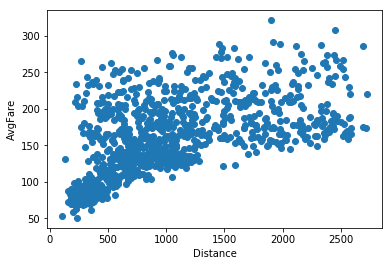

In [100]:
# plot graph between dependent and independent
# 1. Distance vs AvgFare
plt.scatter(airq_X.Distance,airq_Y)
plt.xlabel('Distance')  
plt.ylabel('AvgFare')
plt.show()
# very closly related distance with AvgFare

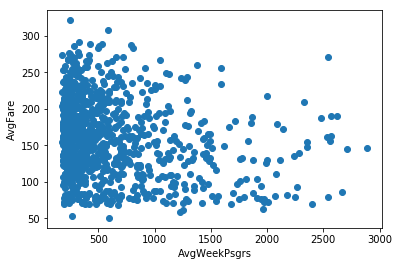

In [106]:
2. # 1. Distance vs AvgFare
plt.scatter(airq_X.AvgWeekPsgrs,airq_Y)
plt.xlabel('AvgWeekPsgrs')  
plt.ylabel('AvgFare')
plt.show()
# plot is scattered all around.

In [102]:
airq_X.AvgWeekPsgrs.corr(airq_Y)
# below absolute value of correlatin is not less than  0.1

-0.22236112558021642

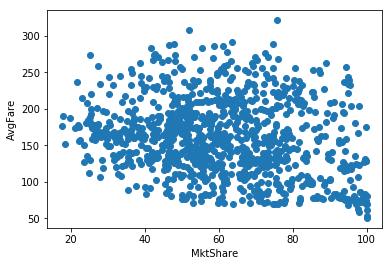

In [104]:
# 3. MktShare vs AvgFare
plt.scatter(airq_X.MktShare,airq_Y)
plt.xlabel('MktShare')  
plt.ylabel('AvgFare')
plt.show()
# plot is scattered all around.

In [105]:
airq_X.MktShare.corr(airq_Y)

-0.22918395707241584

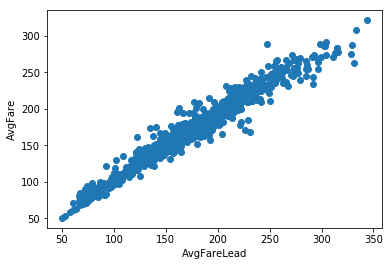

In [108]:
# 4. AvgFareLead vs AvgFare
plt.scatter(airq_X.AvgFareLead,airq_Y)
plt.xlabel('AvgFareLead')  
plt.ylabel('AvgFare')
plt.show()
# there is strong correlation between AvgFareLead and AvgFare

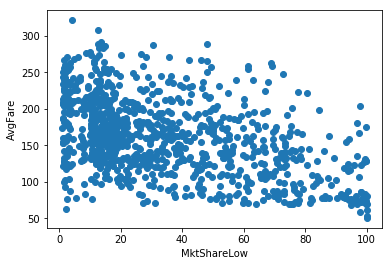

In [109]:
# 5. AvgFareLead and AvgFare
plt.scatter(airq_X.MktShareLow,airq_Y)
plt.xlabel('MktShareLow')  
plt.ylabel('AvgFare')
plt.show()
# scattered graph

In [110]:
airq_X.MktShareLow.corr(airq_Y)

-0.47563284050808513

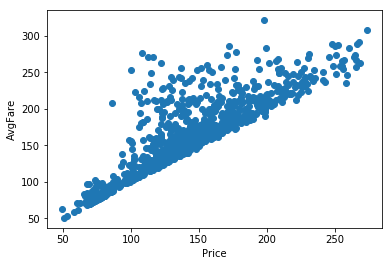

In [111]:
# 5. AvgFareLead and AvgFare
plt.scatter(airq_X.Price,airq_Y)
plt.xlabel('Price')  
plt.ylabel('AvgFare')
plt.show()
# strong correlated

In [116]:
airq_X.CityFrom.corr(airq_Y) # which is less than 0.1 that's why going to drop ciryfrom column

-0.09597862967841017

In [0]:
airq_X=airq_X.drop(columns=['CityFrom'],axis=1)

In [119]:
airq_X.CityTo.corr(airq_Y) # which is less than 0.1 that's why going  to drop CityTo column

-0.04674363297537938

In [0]:
airq_X=airq_X.drop(columns=['CityTo'],axis=1)

In [121]:
airq_X.dtypes

Distance          int64
AvgWeekPsgrs    float64
MktLeadArLn        int8
MktShare        float64
AvgFareLead     float64
LowPriceArLn       int8
MktShareLow     float64
Price           float64
dtype: object

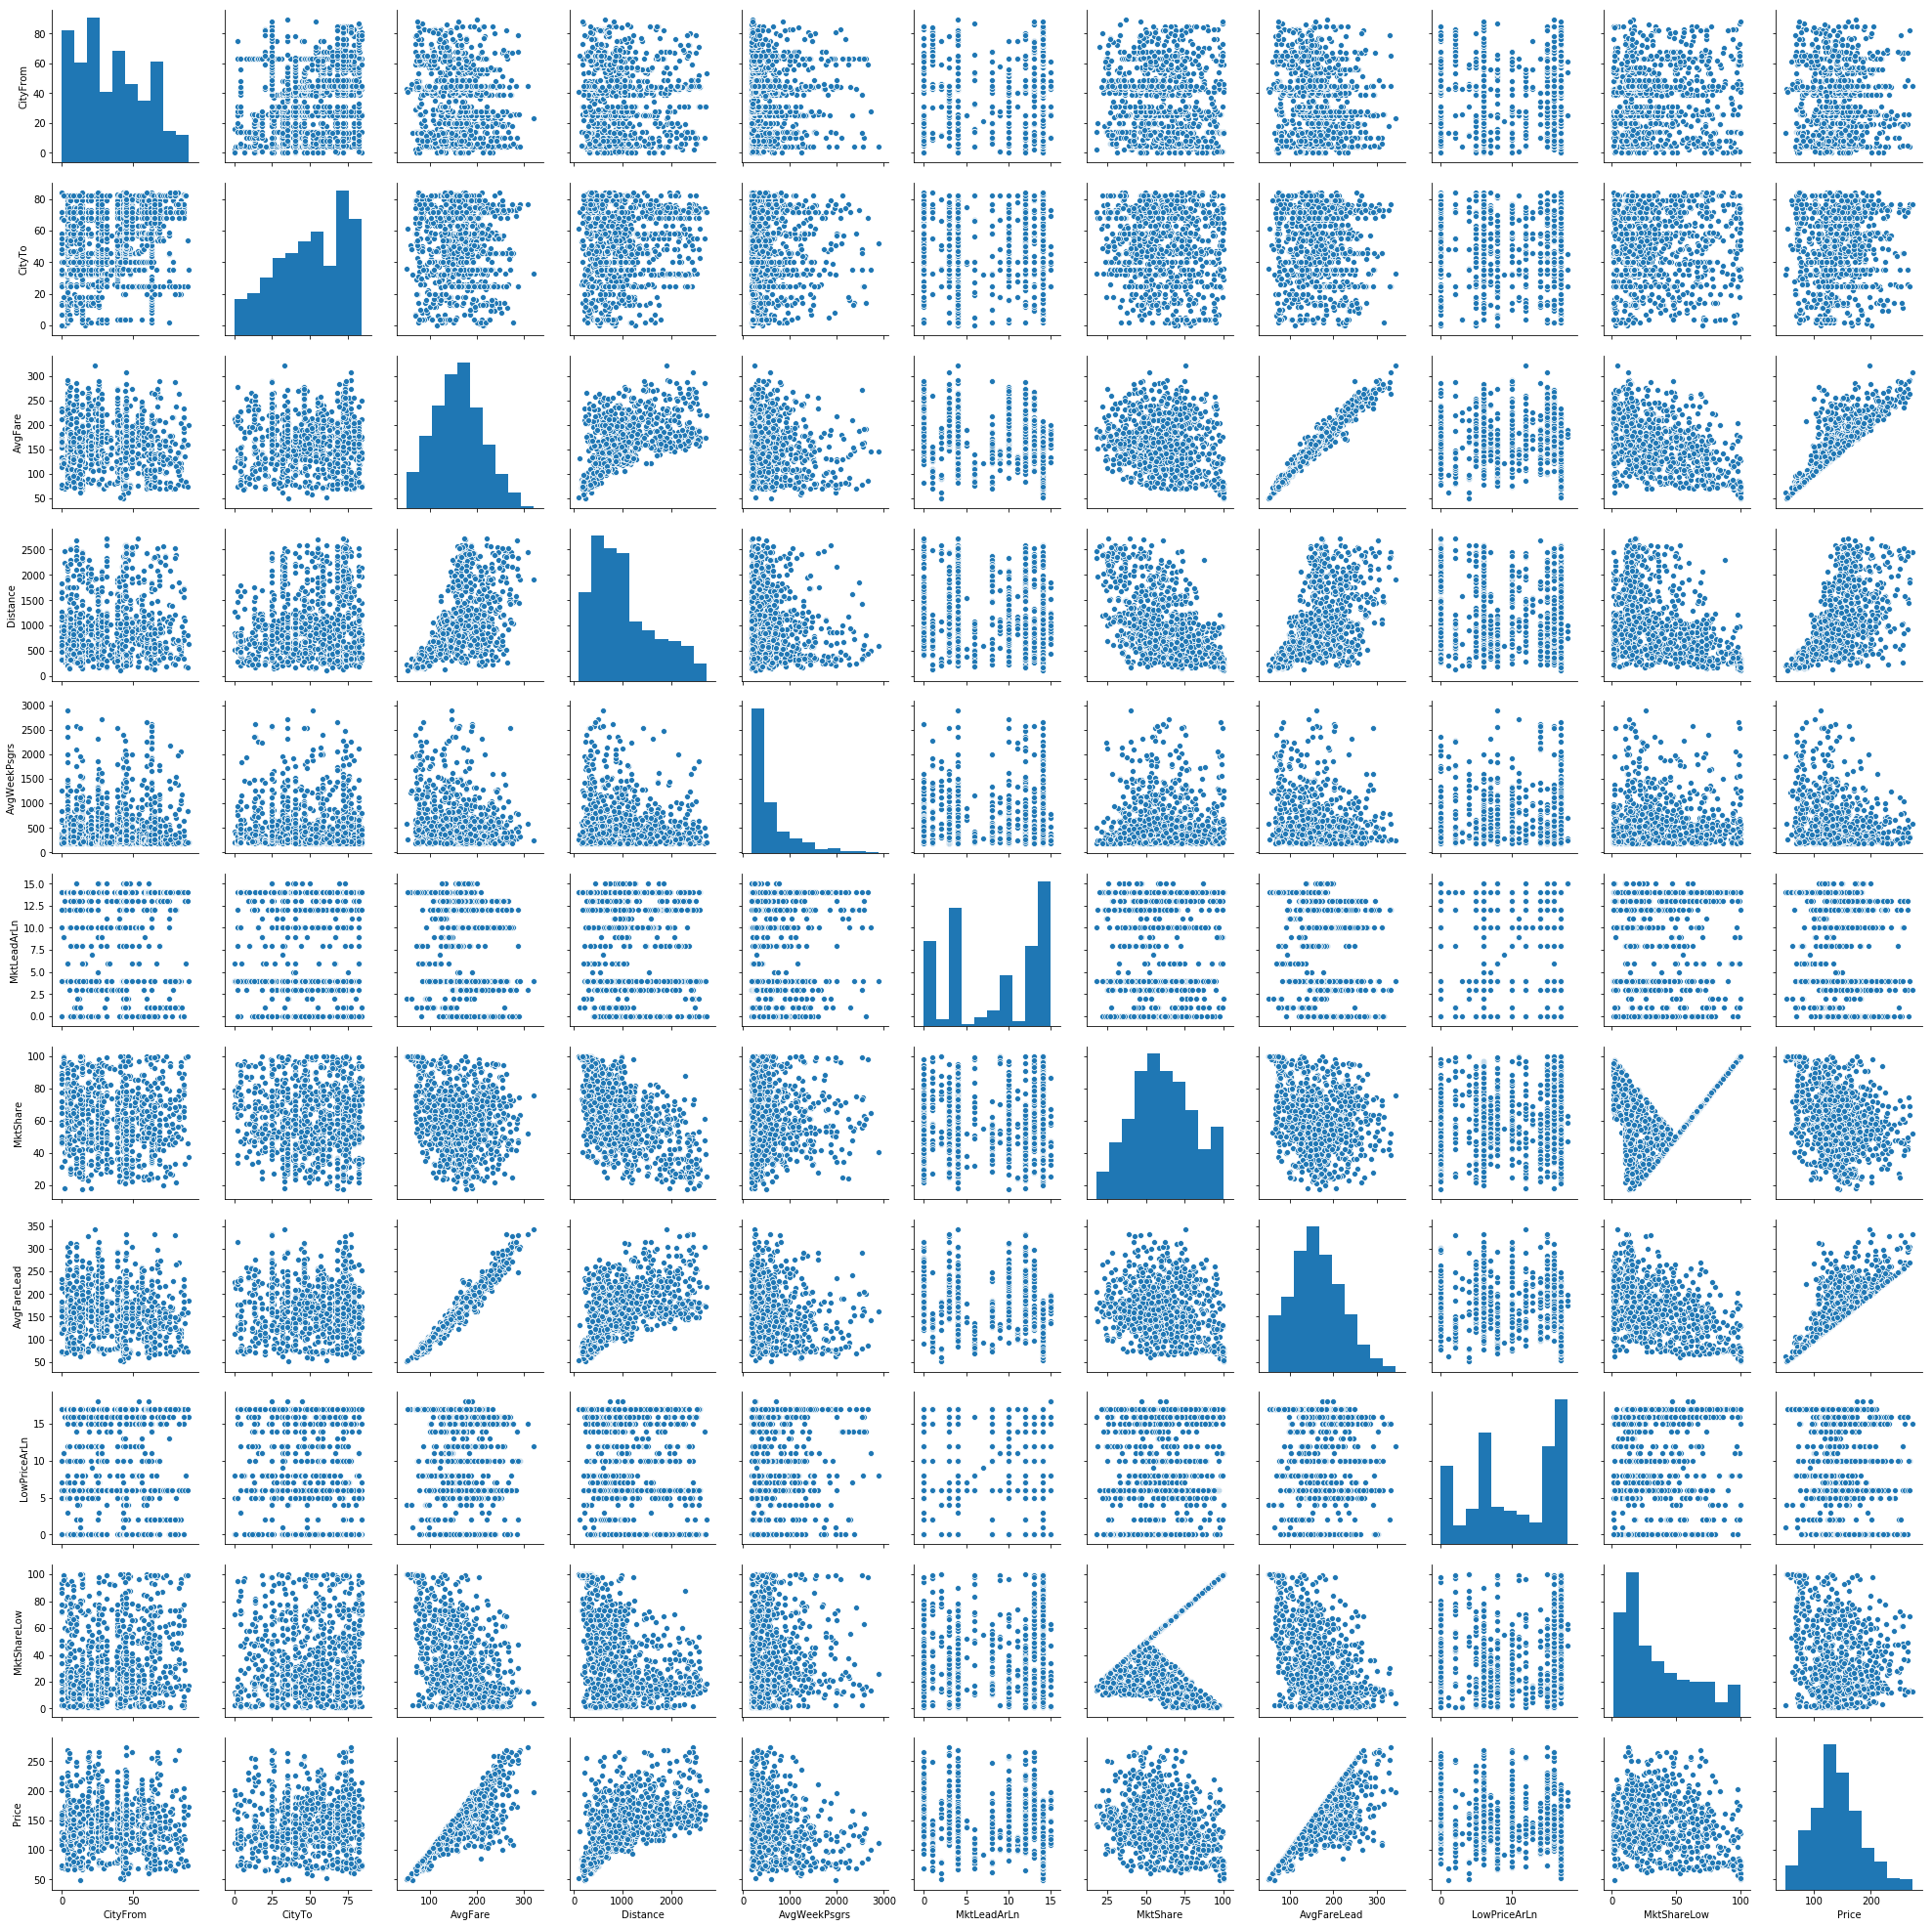

In [112]:
sns.pairplot(airq_enc)

In [0]:
# devide dataset into trainging and test dataset 
X_train, X_test,Y_train,Y_test=train_test_split(airq_X,airq_Y,test_size = 0.2)

In [0]:
# use lenear regression 
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

In [129]:
# When applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².
r_sq = regression_model.score(X_train, Y_train)
r_sq

0.9742446428414244

In [130]:
print('intercept:', regression_model.intercept_)

intercept: 8.343290210519541


In [132]:
print('coefficient :', regression_model.coef_)

coefficient : [ 0.00239951 -0.00158011 -0.20319573  0.07258459  0.72237386  0.12910215
 -0.05556152  0.21719959]


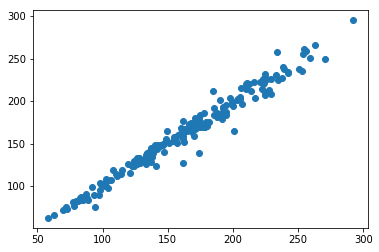

In [135]:
plt.scatter(Y_test,Y_pred)
# below scatter plot shows that model predicting value whihc very close or near to y test value. 

In [138]:
mse = np.mean((regression_model.predict(X_test)-Y_test)**2)
mse

67.38610254020055

In [139]:
import math

math.sqrt(mse)

8.208903857409986